In [ ]:
%pip install stanza
%pip install pandas
import re
import stanza
stanza.download("ru")
nlp_stanza = stanza.Pipeline(lang="ru", processors="tokenize, pos, lemma, depparse, ner")
import pandas as pd

In [ ]:
%pip install matplotlib
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns

**Загрузка файлов для работы**

In [72]:
with open('istoria_vcherashnego_dnya(1851).txt', encoding='utf-8') as f:
    text_istoria = f.read()

with open('detstvo(1852).txt', encoding='cp1251') as f:
    text_detstvo = f.read()
    
with open('nabeg(1853).txt', encoding='cp1251') as f:
    text_nabeg = f.read()

with open('svyatochnaya_noch(1853).txt', encoding='utf-8') as f:
    text_noch = f.read()

with open('otrochestvo(1854).txt', encoding='cp1251') as f:
    text_otroch = f.read()

with open('zapiski_markyora(1855).txt', encoding='cp1251') as f:
    text_mark = f.read()

with open('rubka_lesa(1855).txt', encoding='cp1251') as f:
    text_les = f.read()

with open('sevastopolskie_stories(1855-56).txt', encoding='cp1251') as f:
    text_sevast = f.read()

with open('dva_gusara(1856).txt', encoding='cp1251') as f:
    text_gusar = f.read()
    
with open('utro_pomeshika(1856).txt', encoding='cp1251') as f:
    text_utro = f.read()

with open('metel(1856).txt', encoding='cp1251') as f:
    text_metel = f.read()

with open('razjalovanny(1856).txt', encoding='cp1251') as f:
    text_razj = f.read()

with open('youth(1857).txt', encoding='cp1251') as f:
    text_youth = f.read()

with open('lucern(1857).txt', encoding='cp1251') as f:
    text_luc = f.read()

with open('albert(1858).txt', encoding='cp1251') as f:
    text_albert = f.read()

with open('tri_smerti(1859).txt', encoding='cp1251') as f:
    text_tri = f.read()

with open('polikushka(1862).txt', encoding='cp1251') as f:
    text_pol = f.read()

with open('voina_mir_1-2(1867).txt', encoding='cp1251') as f:
    text_vm1 = f.read()

with open('voina_mir_3-4(1867).txt', encoding='cp1251') as f:
    text_vm2 = f.read()

with open('anna_karenina(1875-77).txt', encoding='cp1251') as f:
    text_anna = f.read()

with open('voskresenie.txt', encoding='cp1251') as f:
    text_vos = f.read()

with open('family_happiness(1859).txt', encoding='utf-8') as f:
    text_happy = f.read()

with open('dekabristi(1860-61).txt', encoding='cp1251') as f:
    text_dek = f.read()

with open('kazaki(1863).txt', encoding='utf-8') as f:
    text_kazak = f.read()

with open('father_sergy(1890-1898).txt', encoding='utf-8') as f:
    text_serg = f.read()

with open('hadji-murat(1896-1904).txt', encoding='utf-8') as f:
    text_hadj = f.read()

with open('sonata(1887-1889).txt', encoding='utf-8') as f:
    text_sonata = f.read()

with open('smert_ivana_ilicha.txt', encoding='utf-8') as f:
    text_ivan = f.read()

with open('hodinka(1910).txt', encoding='utf-8') as f:
    text_hod = f.read()

with open('nechayano(1910).txt', encoding='utf-8') as f:
    text_nech = f.read()

with open('pochva(1910).txt', encoding='utf-8') as f:
    text_poch = f.read()

with open('kavkazsky_plennik(1872).txt', encoding='cp1251') as f:
    text_plennik = f.read()

**I. Предобработка текстов. Анализ синтаксиса: подсчет клаузных тэгов**

"История вчерашнего дня" 1851 года

In [77]:
# На этом этапе нужно предобработать текст. 
# 1) Сначала переводим текст в нижний регистр, но не чистим от пунктуации, так как она будет важна для синтаксического анализа;
text_istoria = text_istoria.lower()

# 2) Теперь с помощью регулярного выражения убираем ссылки - в данном случае цифры в квадратных скобках;
no_notes_istoria = re.sub(r'\[.\d+.\]', '', text_istoria)

# 3) По официальным данным, квадратными скобками в тексте обозначен редакторский текст и комментарии - убираем именно комментарии, 
# так как редакторским текстом часто дописаны незаконченные слова; затем чистим дополненные редакторами слова от квадратных скобок;
no_comments_istoria = re.sub(r'\[неразобр\.\]', '', no_notes_istoria)
no_left_brackets_istoria = re.sub(r'\[', '', no_comments_istoria)
no_brackets_istoria = re.sub(r'\]', '', no_left_brackets_istoria)

# 4) Круглыми скобками обозначен текст, зачеркнутый Л. H. Толстым - поэтому логичнее его тоже убрать
no_unwanted_lines_istoria = re.sub(r'\(.+?\)', '', no_brackets_istoria)

# 5) После обработки между знаками препинания и словами появились один пробел и более, поэтому этим этапом вернем им красивый вид
joined_dots_istoria = re.sub(r'\s+\.', '.', no_unwanted_lines_istoria)
joined_commas_istoria = re.sub(r'\s+\,', ',', joined_dots_istoria)
clean_text_istoria = re.sub(r'\s+;', ';', joined_commas_istoria)
# print(clean_text_istoria)


In [78]:
# 1) Собираем данные предложений с помощью stanza 

doc = nlp_stanza(clean_text_istoria)

all_tags_istoria = 0
clause_tags_istoria = ['acl', 'advcl', 'csubj', 'ccomp', 'xcomp']
clause_count_istoria = 0

# 2) теперь создаем словарь для подсчета клаузных тэгов
clause_tag_counts = {tag: 0 for tag in clause_tags_istoria}

for sentence in doc.sentences:
    for word in sentence.words:
        all_tags_istoria += 1
        
        if word.deprel in clause_tags_istoria:
            clause_count_istoria += 1
            clause_tag_counts[word.deprel] += 1

# 3) выводим общие результаты
print('Общее количество синтаксических тэгов:', all_tags_istoria)
print('Количество клаузных тэгов:', clause_count_istoria)
# 4) Считаем долю клаузных тэгов от их общего числа (сразу же округляем и превращаем в процентное число)
print(f'Доля клаузных тэгов от общего числа тэгов: {clause_count_istoria / all_tags_istoria:.2%}')

# 5) выводим количество и долю по каждому клаузному тэгу
print('\nКоличество и доля по каждому клаузному тэгу:')
for tag, count in clause_tag_counts.items():
    print(f'Тэг: {tag}, Количество: {count}, Доля: {count / all_tags_istoria:.2%}')

Общее количество синтаксических тэгов: 7768
Количество клаузных тэгов: 462
Доля клаузных тэгов от общего числа тэгов: 5.95%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 37, Доля: 0.48%
Тэг: advcl, Количество: 139, Доля: 1.79%
Тэг: csubj, Количество: 61, Доля: 0.79%
Тэг: ccomp, Количество: 114, Доля: 1.47%
Тэг: xcomp, Количество: 111, Доля: 1.43%


"Детство" 1852 года

In [43]:
# 1) Переводим текст в нижний регистр
text_detstvo = text_detstvo.lower()

# 2) Убираем из текста обозначения глав
no_chapters_detstvo = re.sub(r'глава.+\n+.+', '', text_detstvo)

# 3) Французские переводы оставляем, так как там есть предложения. Цифры чистим
no_figures_detstvo = re.sub(r'\d+\....', '', no_chapters_detstvo)

# 4) Убираем неразрывные пробелы из текста 
no_symbols_detstvo = re.sub(r'\xa0', '', no_figures_detstvo)
no_codes_detstvo = re.sub(r'&#\d+;', '', no_symbols_detstvo)

# 5) При обработке текста многие знаки препинания "оторвались" от слов. Вернем их на место
joined_dots_detstvo = re.sub(r'\s+\.', '.', no_codes_detstvo)
clean_text_detstvo = re.sub(r'\s+\,', ',', joined_dots_detstvo)
# print(clean_text_detstvo)

In [44]:
# Чтобы каждый раз не копировать одну и ту же программу, положим ее в функцию

def analyze_clauses(text):
    doc = nlp_stanza(text)

    all_tags_ = 0
    clause_tags_ = ['acl', 'advcl', 'csubj', 'ccomp', 'xcomp']
    clause_count_ = 0
    clause_tag_counts = {tag: 0 for tag in clause_tags_}

    for sentence in doc.sentences:
        for word in sentence.words:
            all_tags_ += 1
            
            if word.deprel in clause_tags_:
                clause_count_ += 1
                clause_tag_counts[word.deprel] += 1

    print('Общее количество синтаксических тэгов:', all_tags_)
    print('Количество клаузных тэгов:', clause_count_)
    print(f'Доля клаузных тэгов от общего числа тэгов: {clause_count_ / all_tags_:.2%}')
    print('\nКоличество и доля по каждому клаузному тэгу:')
    for tag, count in clause_tag_counts.items():
        print(f'Тэг: {tag}, Количество: {count}, Доля: {count / all_tags_:.2%}')

analyze_clauses(clean_text_detstvo)

Общее количество синтаксических тэгов: 37763
Количество клаузных тэгов: 1968
Доля клаузных тэгов от общего числа тэгов: 5.21%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 214, Доля: 0.57%
Тэг: advcl, Количество: 708, Доля: 1.87%
Тэг: csubj, Количество: 122, Доля: 0.32%
Тэг: ccomp, Количество: 362, Доля: 0.96%
Тэг: xcomp, Количество: 562, Доля: 1.49%


"Набег" 1853 года

In [81]:
# 1) Пока текст не переведен в нижний регистр, будет удобно очистить его от глав, обозначенных римскими цифрами
no_is_nabeg = re.sub(r'I+', '', text_nabeg)
no_vs_nabeg = re.sub(r'V\n', '', no_is_nabeg)
no_chapters_nabeg = re.sub(r'X+', '', no_vs_nabeg)

# 2) Теперь переводим текст в нижний регистр
no_chapters_nabeg = no_chapters_nabeg.lower()

# 3) Убираем неразрывные пробелы и цифры
no_symbols_nabeg = re.sub(r'\xa0', '', no_chapters_nabeg)
no_codes_nabeg = re.sub(r'.&#\d+;', '', no_symbols_nabeg)
no_figures_nabeg = re.sub(r'\d+...', '', no_codes_nabeg)

# 4) Чистим от не имеющих отношения к предложениям слов по типу "франц." или "прим."
no_franc_nabeg = re.sub(r'\(франц\.\)', '', no_figures_nabeg)
no_prim_nabeg = re.sub(r'\(прим.+?\)', '', no_franc_nabeg)

# 5) "Приклеиваем" обратно знаки препинания
joined_dots_nabeg = re.sub(r'\s+\.', '.', no_prim_nabeg)
clean_text_nabeg = re.sub(r'\s+\,', ',', joined_dots_nabeg)
# print(clean_text_nabeg)

In [ ]:
analyze_clauses(clean_text_nabeg)

Общее количество синтаксических тэгов: 9337
Количество клаузных тэгов: 417
Доля клаузных тэгов от общего числа тэгов: 4.47%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 72, Доля: 0.77%
Тэг: advcl, Количество: 139, Доля: 1.49%
Тэг: csubj, Количество: 38, Доля: 0.41%
Тэг: ccomp, Количество: 72, Доля: 0.77%
Тэг: xcomp, Количество: 96, Доля: 1.03%


"Святочная ночь" 1853 года

In [83]:
# 1) В первую очередь чистим текст от сносок в квадратных скобках и глав
no_notes_noch = re.sub(r'\[.+?\]', '', text_noch)
no_chapters1_noch = re.sub(r'^(?:I.+|V.+)', '', no_notes_noch, flags=re.MULTILINE)
no_chapters_noch = re.sub(r'I\n', '', no_chapters1_noch)

# 2) Переводим в нижний регистр
no_chapters_noch = no_chapters_noch.lower()

# 3) По оф. данным угловыми скобками обозначен текст, зачеркнутый Л.Н.Толстым, поэтому убираем его
no_unwanted_lines_noch = re.sub(r'\<.+?\>', '', no_chapters_noch)

# 4) Возвращаем знаки препинания на места
joined_commas_noch = re.sub(r'\s+\,', ',', no_unwanted_lines_noch)
clean_text_noch = re.sub(r'\s+\.', '.', joined_commas_noch)
# print(clean_text_noch)


In [ ]:
analyze_clauses(clean_text_noch)

Общее количество синтаксических тэгов: 7152
Количество клаузных тэгов: 354
Доля клаузных тэгов от общего числа тэгов: 4.95%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 88, Доля: 1.23%
Тэг: advcl, Количество: 105, Доля: 1.47%
Тэг: csubj, Количество: 21, Доля: 0.29%
Тэг: ccomp, Количество: 52, Доля: 0.73%
Тэг: xcomp, Количество: 88, Доля: 1.23%


"Отрочество" 1854 года

In [85]:
# 1) Переводим текст в нижний регистр
text_otroch = text_otroch.lower()

# 2) Чистим от глав и их названий
no_chapters_otroch = re.sub(r'глава.+\n+.+', '', text_otroch)

# 3) Чистим от символов
no_symbols_otroch = re.sub(r'.&#\d+;', '', no_chapters_otroch)

# 4) В этом произведении логично будет оставить вставки с переводом французского, так как в них содержатся целые предложения. А цифры почистим
no_figures_otroch = re.sub(r'\d+\....', '', no_symbols_otroch)

# 5) Возвращаем символы на место
clean_text_otroch = re.sub(r'\s+\.', '.', no_figures_otroch)
# print(clean_text_otroch)

In [ ]:
analyze_clauses(clean_text_otroch)

Общее количество синтаксических тэгов: 29465
Количество клаузных тэгов: 1443
Доля клаузных тэгов от общего числа тэгов: 4.90%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 235, Доля: 0.80%
Тэг: advcl, Количество: 464, Доля: 1.57%
Тэг: csubj, Количество: 58, Доля: 0.20%
Тэг: ccomp, Количество: 271, Доля: 0.92%
Тэг: xcomp, Количество: 415, Доля: 1.41%


"Записки Маркёра" 1855 года

In [87]:
# 1) Переводим текст в нижний регистр
text_mark = text_mark.lower()

# 2) Чистим от цифр, ненужных вставок "от франц." и кодов
no_franc_mark = re.sub(r'\(от.франц\..+\)', '', text_mark)
no_codes_mark = re.sub(r'&#\d+;', 'о', no_franc_mark)
no_figures_mark = re.sub(r'\d+...', '', no_codes_mark)


# 3) Возвращаем на свои места знаки препинания
joined_commas_mark = re.sub(r'\s+\,', ',', no_figures_mark)
clean_text_mark = re.sub(r'\s+\.', '.', joined_commas_mark)
# print(clean_text_mark)

In [ ]:
analyze_clauses(clean_text_mark)

Общее количество синтаксических тэгов: 6933
Количество клаузных тэгов: 204
Доля клаузных тэгов от общего числа тэгов: 2.94%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 9, Доля: 0.13%
Тэг: advcl, Количество: 40, Доля: 0.58%
Тэг: csubj, Количество: 21, Доля: 0.30%
Тэг: ccomp, Количество: 42, Доля: 0.61%
Тэг: xcomp, Количество: 92, Доля: 1.33%


"Рубка леса" 1855 года

In [89]:
# 1) Чистим главы
no_chapters_les = re.sub(r'I\.|X.+|V.+|I.+\.', '', text_les)

# # 2) Переводим в нижний регистр, чистим от ненужных слов "франц.", цифр и кодов
no_chapters_les = no_chapters_les.lower()
no_stars_les = re.sub(r'\*', '', no_chapters_les)
clean_text_les = re.sub(r'\(от.франц\..+\)', '', no_stars_les)
# print(clean_text_les)

In [ ]:
analyze_clauses(clean_text_les)

Общее количество синтаксических тэгов: 13836
Количество клаузных тэгов: 553
Доля клаузных тэгов от общего числа тэгов: 4.00%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 67, Доля: 0.48%
Тэг: advcl, Количество: 233, Доля: 1.68%
Тэг: csubj, Количество: 30, Доля: 0.22%
Тэг: ccomp, Количество: 84, Доля: 0.61%
Тэг: xcomp, Количество: 139, Доля: 1.00%


"Севастопольские рассказы" 1855-1856 годов

In [91]:
# 1) Переводим текст в нижний регистр
text_sevast = text_sevast.lower()

# 2) Чистим от цифр в главах и сносках, а также от ненужных слов по типу "л.н.толстой", "франц.", "польск.", "лат."
no_chapters_sevast = re.sub(r'\d+\n', '', text_sevast)
no_figures_sevast = re.sub(r'\d{1,2}\s-\s', '', no_chapters_sevast)
no_name_sevast = re.sub(r'\(л\..+?\)', '', no_figures_sevast)
no_polish_notes = re.sub(r'\(пол.+\)', '', no_name_sevast)
no_franc_sevast = re.sub(r'\(франц\.\)', '', no_polish_notes)
no_lat_sevast = re.sub(r'\(лат\.\)', '', no_franc_sevast)

# 3) Приклеиваем знаки препинания
clean_text_sevast = re.sub(r'\s+\,', ',', no_lat_sevast)
# print(clean_text_sevast)

In [ ]:
analyze_clauses(clean_text_sevast)

Общее количество синтаксических тэгов: 46003
Количество клаузных тэгов: 2012
Доля клаузных тэгов от общего числа тэгов: 4.37%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 363, Доля: 0.79%
Тэг: advcl, Количество: 758, Доля: 1.65%
Тэг: csubj, Количество: 103, Доля: 0.22%
Тэг: ccomp, Количество: 309, Доля: 0.67%
Тэг: xcomp, Количество: 479, Доля: 1.04%


"Два гусара" 1856 года

In [93]:
# 1) Чистим от глав-римский цифр
no_chapters_gusar = re.sub(r'I\.|X.+|V.+|I.+\.', '', text_gusar)

# 2) Переводим в нижний регистр
small_gusar = no_chapters_gusar.lower()

# 3) Избавляемся от лишних цифр
no_figures_gusar = re.sub(r'\d\s{2,3}', '', small_gusar)

# 4) Приклеиваем знаки препинания
clean_text_gusar = re.sub(r'\s+\!', '!', no_figures_gusar)


In [ ]:
analyze_clauses(clean_text_gusar)

Общее количество синтаксических тэгов: 22118
Количество клаузных тэгов: 984
Доля клаузных тэгов от общего числа тэгов: 4.45%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 135, Доля: 0.61%
Тэг: advcl, Количество: 366, Доля: 1.65%
Тэг: csubj, Количество: 52, Доля: 0.24%
Тэг: ccomp, Количество: 155, Доля: 0.70%
Тэг: xcomp, Количество: 276, Доля: 1.25%


"Утро помещика" 1856 года

In [95]:
# 1) Чистим от глав-цифры и кодов 
no_chapters_utro = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_utro)
no_codes_utro = re.sub(r'&#\d+;', '', no_chapters_utro)

# 2) Переводим в нижний регистр
small_utro = no_codes_utro.lower()

# 3) Чистим сноски от ненужных слов "франц." и цифры
no_figures_utro = re.sub(r'\d.-.', '', small_utro)
no_franc_utro = re.sub(r'\(франц\.\)', '', no_figures_utro)

# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', no_franc_utro)
clean_text_utro = re.sub(r'\s+\.', '.', no_franc_utro)

In [ ]:
analyze_clauses(clean_text_utro)

Общее количество синтаксических тэгов: 20212
Количество клаузных тэгов: 911
Доля клаузных тэгов от общего числа тэгов: 4.51%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 130, Доля: 0.64%
Тэг: advcl, Количество: 353, Доля: 1.75%
Тэг: csubj, Количество: 85, Доля: 0.42%
Тэг: ccomp, Количество: 118, Доля: 0.58%
Тэг: xcomp, Количество: 225, Доля: 1.11%


"Метель" 1856 года

In [97]:
# 1) Чистим от глав-цифр
no_chapters_metel = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_metel)

# 2) Переводим в нижний регистр
small_metel = no_chapters_metel.lower()

# 3) Заменяем коды на отсутствующие буквы в словах "что" и "клади" 
no_codes_metel1 = re.sub(r'&#243;', 'о', small_metel)
clean_text_metel = re.sub(r'&#225;', 'а', no_codes_metel1)

In [ ]:
analyze_clauses(clean_text_metel)

Общее количество синтаксических тэгов: 10947
Количество клаузных тэгов: 455
Доля клаузных тэгов от общего числа тэгов: 4.16%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 80, Доля: 0.73%
Тэг: advcl, Количество: 178, Доля: 1.63%
Тэг: csubj, Количество: 34, Доля: 0.31%
Тэг: ccomp, Количество: 66, Доля: 0.60%
Тэг: xcomp, Количество: 97, Доля: 0.89%


"Разжалованный" 1856 года

In [99]:
# 1) Обнаруживаем, что у исходника очень чистый текст для анализа, поэтому просто переводим в нижний регистр
clean_text_razj = text_razj.lower()

In [ ]:
analyze_clauses(clean_text_razj)

Общее количество синтаксических тэгов: 10077
Количество клаузных тэгов: 485
Доля клаузных тэгов от общего числа тэгов: 4.81%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 55, Доля: 0.55%
Тэг: advcl, Количество: 173, Доля: 1.72%
Тэг: csubj, Количество: 32, Доля: 0.32%
Тэг: ccomp, Количество: 91, Доля: 0.90%
Тэг: xcomp, Количество: 134, Доля: 1.33%


"Юность" 1857 года

In [101]:
# 1) Чистим главы-цифры и названия
no_chapters_youth = re.sub(r'Глава.+\n\n.+', '', text_youth)

# 2) Чистим сноски от лишних цифр и убираем коды
no_figures_youth = re.sub(r'\d+\.\s-.', '', no_chapters_youth)
no_codes_youth = re.sub(r'&#\d+;', '', no_figures_youth)

# 3) Переводим в нижний регистр
small_youth = no_codes_youth.lower()

# 4) Форматируем знаки препинания
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', no_codes_youth)
clean_text_youth = re.sub(r'\s+\?', '?', small_youth)

In [ ]:
analyze_clauses(clean_text_youth)

Общее количество синтаксических тэгов: 61647
Количество клаузных тэгов: 3245
Доля клаузных тэгов от общего числа тэгов: 5.26%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 523, Доля: 0.85%
Тэг: advcl, Количество: 1117, Доля: 1.81%
Тэг: csubj, Количество: 175, Доля: 0.28%
Тэг: ccomp, Количество: 603, Доля: 0.98%
Тэг: xcomp, Количество: 827, Доля: 1.34%


"Люцерн" 1857 года

In [103]:
# Снова встречаем очень чистый исходник, поэтому просто переводим в нижний регистр
clean_text_luc = text_luc.lower()

In [ ]:
analyze_clauses(clean_text_luc)

Общее количество синтаксических тэгов: 9532
Количество клаузных тэгов: 408
Доля клаузных тэгов от общего числа тэгов: 4.28%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 80, Доля: 0.84%
Тэг: advcl, Количество: 141, Доля: 1.48%
Тэг: csubj, Количество: 13, Доля: 0.14%
Тэг: ccomp, Количество: 56, Доля: 0.59%
Тэг: xcomp, Количество: 118, Доля: 1.24%


"Альберт" 1858 года

In [105]:
# 1) Удаляем главы-римские цифры, коды и слова "франц." и "нем."
no_chapters_albert = re.sub(r'^I.+\n|^I\n|^V.+\n|^V\n', '', text_albert)
no_codes_albert = re.sub(r'&#\d+', '', no_chapters_albert)
no_franc_nem_albert = re.sub(r'\(нем\.\)|\(франц\.\)', '', no_codes_albert)
no_figures_albert = re.sub(r'\d.-.', '', no_franc_nem_albert)

# 2) Переводим в нижний регистр
small_albert = no_figures_albert.lower()

# 3) Форматируем знаки препинания
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_albert)
clean_text_albert = re.sub(r'\s+\.', '.', small_albert)

In [ ]:
analyze_clauses(clean_text_albert)

Общее количество синтаксических тэгов: 10423
Количество клаузных тэгов: 442
Доля клаузных тэгов от общего числа тэгов: 4.24%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 52, Доля: 0.50%
Тэг: advcl, Количество: 169, Доля: 1.62%
Тэг: csubj, Количество: 25, Доля: 0.24%
Тэг: ccomp, Количество: 51, Доля: 0.49%
Тэг: xcomp, Количество: 145, Доля: 1.39%


"Три смерти" 1859 года

In [107]:
# Убираем главы
no_chapters_tri = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_tri)

# Переводим в нижний регистр
clean_text_tri = no_chapters_tri.lower()

In [ ]:
analyze_clauses(clean_text_tri)

Общее количество синтаксических тэгов: 4893
Количество клаузных тэгов: 171
Доля клаузных тэгов от общего числа тэгов: 3.49%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 22, Доля: 0.45%
Тэг: advcl, Количество: 76, Доля: 1.55%
Тэг: csubj, Количество: 3, Доля: 0.06%
Тэг: ccomp, Количество: 13, Доля: 0.27%
Тэг: xcomp, Количество: 57, Доля: 1.16%


"Семейное счастье" 1859 года

In [ ]:
# 1) Чистим от частей и глав, убираем "звездочки"
no_chapters_happy = re.sub(r'Часть.+', '', text_happy)
no_parts_happy = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', no_chapters_happy)
no_asterisk_happy = re.sub(r'\*', '', no_parts_happy)

# 2) Переводим в нижний регистр и форматируем знаки препинания
small_happy = no_asterisk_happy.lower()
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_happy)
clean_text_happy = re.sub(r'\s+\.', '.', small_happy)


In [ ]:
analyze_clauses(clean_text_happy)

Общее количество синтаксических тэгов: 35413
Количество клаузных тэгов: 1801
Доля клаузных тэгов от общего числа тэгов: 5.09%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 229, Доля: 0.65%
Тэг: advcl, Количество: 563, Доля: 1.59%
Тэг: csubj, Количество: 122, Доля: 0.34%
Тэг: ccomp, Количество: 407, Доля: 1.15%
Тэг: xcomp, Количество: 480, Доля: 1.36%


"Поликушка" 1862 года

In [ ]:
# 1) Чистим текст от глав-цифр, кодов, цифрах в сносках и комментариев "(нем.)"
no_chapters_pol = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_pol)
no_codes_pol = re.sub(r'&#228;', '', no_chapters_pol)
codes_replace_pol = re.sub(r'&#243;', 'о', no_codes_pol)
no_figures_pol = re.sub(r'\d.-.', '', codes_replace_pol)
no_notes_pol = re.sub(r'\(нем\.\)', '', no_figures_pol)

# 2) Переводим в нижний регистр
clean_text_pol = no_notes_pol.lower()


In [ ]:
analyze_clauses(clean_text_pol)

Общее количество синтаксических тэгов: 21895
Количество клаузных тэгов: 998
Доля клаузных тэгов от общего числа тэгов: 4.56%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 118, Доля: 0.54%
Тэг: advcl, Количество: 338, Доля: 1.54%
Тэг: csubj, Количество: 63, Доля: 0.29%
Тэг: ccomp, Количество: 174, Доля: 0.79%
Тэг: xcomp, Количество: 305, Доля: 1.39%


"Война и мир" 1-2 тома 1867 года

In [80]:
# 1) Убираем ссылки на другие томы и издания, цифры из сносок с переводами, метки о языке, метки о редактуре
no_references_vm1 = re.sub(r'\(\d+\, (?:\d+\)|\d+\–\d+\))|\(\d+\)', '', text_vm1)
no_references2_vm1 = re.sub(r'\[(?:1|2|3|4).-.+\]', '', no_references_vm1)
no_figures_vm1 = re.sub(r'\d+\s-.', '', no_references2_vm1)
no_language_notes_vm1 = re.sub(r'\(франц.\)|\(нем.\)|\(лат\.\)', '', no_figures_vm1)
no_notes_vm1 = re.sub(r'\—.Ред\.', '', no_language_notes_vm1)
no_one_note_vm1 = re.sub(r'\[В\..+\]', '', no_notes_vm1)

# 2) Чистим от названий томов, частей и подчастей
no_volumes_vm1 = re.sub(r'^Том\s.+', '', no_one_note_vm1, flags=re.MULTILINE)
no_chapters_vm1 = re.sub(r'^Часть.+', '', no_volumes_vm1, flags=re.MULTILINE)
no_parts_vm1 = re.sub(r'^I.{1,4}\n|^I\n|^V.{1,4}\n|^V\n|^X.{1,4}|^X', '', no_chapters_vm1, flags=re.MULTILINE)

# # 3) Заменяем коды на буквы, чтобы при анализе слова правильно считывались программой
code_replace1_vm1 = re.sub(r'&#225;', 'а', no_parts_vm1)
code_replace2_vm1 = re.sub(r'Сот&#233;', 'Соте', code_replace1_vm1)
code_replace3_vm1 = re.sub(r'перегов&#238;pax', 'переговорах', code_replace2_vm1)
no_codes_vm1 = re.sub(r'&#\d+;|:\s#\w\_\d+\S', '', code_replace3_vm1)


# # # 4) Переводим в нижний регистр и возвращаем знаки препинания на свои места
small_vm1 = no_codes_vm1.lower()
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_vm1)
joined_dots_vm1 = re.sub(r'\s+\.', '.', small_vm1)
joined_commas_vm1 = re.sub(r'\s+\,', ',', joined_dots_vm1)
joined_colons_vm1 = re.sub(r'\s+\:', ':', joined_commas_vm1)
clean_text_vm1 = re.sub(r'\s+\?', '?', joined_colons_vm1)


In [81]:
analyze_clauses(clean_text_vm1)

Общее количество синтаксических тэгов: 302809
Количество клаузных тэгов: 13769
Доля клаузных тэгов от общего числа тэгов: 4.55%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 2541, Доля: 0.84%
Тэг: advcl, Количество: 4698, Доля: 1.55%
Тэг: csubj, Количество: 708, Доля: 0.23%
Тэг: ccomp, Количество: 2232, Доля: 0.74%
Тэг: xcomp, Количество: 3590, Доля: 1.19%


"Война и мир" 3-4 тома 1867 года

In [78]:
# 1) Убираем из текста цифры из сносок, языковые марки, редакторские марки
no_figures_vm2 = re.sub(r'\d+\s-.', '', text_vm2)
no_language_notes_vm2 = re.sub(r'\(франц\.\)|\(нем\.\)|\(лат\.\)', '', no_figures_vm2)
no_edit_notes_vm2 = re.sub(r'\—\sРед\.', '', no_language_notes_vm2)

# 2)
no_volumes_vm2 = re.sub(r'^Том\s.+', '', no_edit_notes_vm2, flags=re.MULTILINE)
no_chapters_vm2 = re.sub(r'^Часть.+', '', no_volumes_vm2, flags=re.MULTILINE)
no_parts_vm2 = re.sub(r'^I.{1,4}\n|^I\n|^V.{1,4}\n|^V\n|^X.{1,4}|^X', '', no_chapters_vm2, flags=re.MULTILINE)


# 3)
code_replace1_vm2 = re.sub(r'чт&#243;', 'что', no_parts_vm2)
code_replace2_vm2 = re.sub(r'слушаю&#8209;с', 'слушаюс', code_replace1_vm2)
code_replace3_vm2 = re.sub(r'д&#253;рней', 'дурней', code_replace2_vm2)
no_codes_vm2 = re.sub(r'&#\d+;|:\s#\w\_\d+\S', '', code_replace3_vm2)

# 4)
small_vm2 = no_codes_vm2.lower()
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_vm2)
clean_text_vm2 = re.sub(r'\s+\.', '.', small_vm2)

In [79]:
analyze_clauses(clean_text_vm2)

Общее количество синтаксических тэгов: 292233
Количество клаузных тэгов: 14403
Доля клаузных тэгов от общего числа тэгов: 4.93%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 3279, Доля: 1.12%
Тэг: advcl, Количество: 4823, Доля: 1.65%
Тэг: csubj, Количество: 791, Доля: 0.27%
Тэг: ccomp, Количество: 2119, Доля: 0.73%
Тэг: xcomp, Количество: 3391, Доля: 1.16%


In [113]:
# Объединяем произведение "Война и мир"
clean_text_voinamir = clean_text_vm1 + '\n' + clean_text_vm2

In [ ]:
analyze_clauses(clean_text_voinamir)

Общее количество синтаксических тэгов: 595038
Количество клаузных тэгов: 28177
Доля клаузных тэгов от общего числа тэгов: 4.74%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 5820, Доля: 0.98%
Тэг: advcl, Количество: 9522, Доля: 1.60%
Тэг: csubj, Количество: 1499, Доля: 0.25%
Тэг: ccomp, Количество: 4354, Доля: 0.73%
Тэг: xcomp, Количество: 6982, Доля: 1.17%


"Декабристы" 1861 года

In [20]:
# 1) Убираем главы
no_chapters_dek = re.sub(r'ГЛАВА.+', '', text_dek)
clean_text_dek = no_chapters_dek.lower()

In [ ]:
analyze_clauses(clean_text_dek)

Общее количество синтаксических тэгов: 12721
Количество клаузных тэгов: 598
Доля клаузных тэгов от общего числа тэгов: 4.70%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 102, Доля: 0.80%
Тэг: advcl, Количество: 193, Доля: 1.52%
Тэг: csubj, Количество: 49, Доля: 0.39%
Тэг: ccomp, Количество: 119, Доля: 0.94%
Тэг: xcomp, Количество: 135, Доля: 1.06%


"Казаки" 1863 года

In [ ]:
# Чистим от глав и цифр в сносках
no_chapters_kazak = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_kazak)
no_figures_kazak = re.sub(r'\b\d{1,2}\.', '', no_chapters_kazak)

clean_text_kazak = no_figures_kazak.lower()

In [ ]:
analyze_clauses(clean_text_kazak)

Общее количество синтаксических тэгов: 60316
Количество клаузных тэгов: 2245
Доля клаузных тэгов от общего числа тэгов: 3.72%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 346, Доля: 0.57%
Тэг: advcl, Количество: 873, Доля: 1.45%
Тэг: csubj, Количество: 118, Доля: 0.20%
Тэг: ccomp, Количество: 337, Доля: 0.56%
Тэг: xcomp, Количество: 571, Доля: 0.95%


"Кавказский пленник" 1872 года

In [75]:
# Чистим главы и заметки о примечании
no_chapters_plennik = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_plennik)
no_comments_plennik = re.sub(r'\(Прим.+\)', '', no_chapters_plennik)

# Переводим в нижний регистр 
clean_text_plennik = no_comments_plennik.lower()

In [76]:
analyze_clauses(clean_text_plennik)

Общее количество синтаксических тэгов: 9024
Количество клаузных тэгов: 236
Доля клаузных тэгов от общего числа тэгов: 2.62%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 7, Доля: 0.08%
Тэг: advcl, Количество: 48, Доля: 0.53%
Тэг: csubj, Количество: 27, Доля: 0.30%
Тэг: ccomp, Количество: 37, Доля: 0.41%
Тэг: xcomp, Количество: 117, Доля: 1.30%


"Анна Каренина" 1875-1877 годов

In [ ]:
# 1) Убираем из текста названия "ЧАСТЬ..." и части-цифры
no_chapters_anna = re.sub(r'ЧАСТЬ.+', '', text_anna)
no_parts_anna = re.sub(r'^I.{1,4}\n|^I\n|^V.{1,4}\n|^V\n|^X.{1,4}|^X', '', no_chapters_anna, flags=re.MULTILINE)

# 2) Делаем замены кодов на буквы, чтобы были чистые понятные слова для программы
code_replace1_anna = re.sub(r'&#243;', 'о', no_parts_anna)
code_replace2_anna = re.sub(r'&#225;', 'а', code_replace1_anna)
code_replace3_anna = re.sub(r'&#233;', 'е', code_replace2_anna)

# 3) Переводим в нижний регистр и форматируем знаки препинания
small_anna = code_replace3_anna.lower()
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_anna)
clean_text_anna = re.sub(r'\s+\.', '.', small_anna)

In [ ]:
analyze_clauses(clean_text_anna)

Общее количество синтаксических тэгов: 345762
Количество клаузных тэгов: 18814
Доля клаузных тэгов от общего числа тэгов: 5.44%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 3059, Доля: 0.88%
Тэг: advcl, Количество: 6372, Доля: 1.84%
Тэг: csubj, Количество: 1210, Доля: 0.35%
Тэг: ccomp, Количество: 3351, Доля: 0.97%
Тэг: xcomp, Количество: 4822, Доля: 1.39%


"Смерть Ивана Ильича" 1882-1886 годов

In [59]:
# 1) Чистим главы и цифры в сносках
no_chapters_ivan = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_ivan)
no_figures_ivan = re.sub(r'\d+\s-.', '', no_chapters_ivan)
no_figures2_ivan = re.sub(r'\d\n', '', no_figures_ivan)

# 2) Переводим в нижний регистр
clean_text_ivan = no_figures2_ivan.lower()

In [60]:
analyze_clauses(clean_text_ivan)

Общее количество синтаксических тэгов: 21869
Количество клаузных тэгов: 1105
Доля клаузных тэгов от общего числа тэгов: 5.05%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 201, Доля: 0.92%
Тэг: advcl, Количество: 315, Доля: 1.44%
Тэг: csubj, Количество: 91, Доля: 0.42%
Тэг: ccomp, Количество: 193, Доля: 0.88%
Тэг: xcomp, Количество: 305, Доля: 1.39%


"Воскресение" 1889-1899 годов

In [120]:
# 1) Убираем главы и части
no_chapters_vos = re.sub(r'ЧАСТЬ.+', '', text_vos)
no_parts_vos = re.sub(r'^I.{1,4}\n|^I\n|^V.{1,4}\n|^V\n|^X.{1,4}|^X', '', no_chapters_vos, flags=re.MULTILINE)

# 2) Удаляем цифры из сносок и языковые марки
no_figures_vos = re.sub(r'\d+\s-.', '', no_parts_vos)
no_language_notes_vos = re.sub(r'\(англ\.\)|\(нем\.\)|\(фр\.\)', '', no_figures_vos)
no_figuresnotes_vos = re.sub(r'\d+\n\n', '', no_language_notes_vos)

# 3) Заменяем коды на буквы
code_replace1_vos = re.sub(r'&#243;', 'о', no_figuresnotes_vos)
code_replace2_vos = re.sub(r'&#61664;', 'а', code_replace1_vos)

# 4) Переводим в нижний регистр и разбираемся со знаками препинания
small_vos = code_replace2_vos.lower()
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_vos)
clean_text_vos = re.sub(r'\s+\.', '.', small_vos)

In [ ]:
analyze_clauses(clean_text_vos)

Общее количество синтаксических тэгов: 174663
Количество клаузных тэгов: 8935
Доля клаузных тэгов от общего числа тэгов: 5.12%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 1943, Доля: 1.11%
Тэг: advcl, Количество: 3101, Доля: 1.78%
Тэг: csubj, Количество: 526, Доля: 0.30%
Тэг: ccomp, Количество: 1224, Доля: 0.70%
Тэг: xcomp, Количество: 2141, Доля: 1.23%


"Крейцерова соната" 1890 года

In [64]:
# 1) Чистим от глав и языковых пометок
no_chapters_sonata = re.sub(r'I\n|I.+\n|X\n|X.+\n|V\n|V.+\n', '', text_sonata)
no_language_mark_sonata = re.sub(r'\(нем\.\)|нем\.|итал\.', '', no_chapters_sonata)

# 2) в нижний регистр и форматируем знаки препинания
small_sonata = no_language_mark_sonata.lower()
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_sonata)
joined_commas_sonata = re.sub(r'\s+\,', ',', small_sonata)
clean_text_sonata = re.sub(r'\s+\.', '.', joined_commas_sonata)

In [65]:
analyze_clauses(clean_text_sonata)

Общее количество синтаксических тэгов: 32851
Количество клаузных тэгов: 1763
Доля клаузных тэгов от общего числа тэгов: 5.37%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 327, Доля: 1.00%
Тэг: advcl, Количество: 516, Доля: 1.57%
Тэг: csubj, Количество: 146, Доля: 0.44%
Тэг: ccomp, Количество: 373, Доля: 1.14%
Тэг: xcomp, Количество: 401, Доля: 1.22%


"Отец Сергий" 1890-98 годов

In [69]:
# 1) Убираем главы, цифры в языковых марках и сносках, языковые марки
no_chapters_serg = re.sub(r'^I.{1,4}\n|^I\n|^V.{1,4}\n|^V\n|^X.{1,4}|^X', '', text_serg, flags=re.MULTILINE)
no_figures1_serg = re.sub(r'\d+\s-.', '', no_chapters_serg)
no_figures_serg = re.sub(r'\d+\n', '', no_figures1_serg)
no_language_mark_serg = re.sub(r'\(франц\.\)', '', no_figures_serg)

# 2) Переводим в нижний регистр и форматиурем знаки препинания
small_serg = no_language_mark_serg.lower()
# re.findall(r'\s+(?:\.|\,|\;|\:|\!|\?)', small_serg)
clean_text_serg = re.sub(r'\s+\.', '.', small_serg)

In [70]:
analyze_clauses(clean_text_serg)

Общее количество синтаксических тэгов: 17447
Количество клаузных тэгов: 793
Доля клаузных тэгов от общего числа тэгов: 4.55%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 127, Доля: 0.73%
Тэг: advcl, Количество: 256, Доля: 1.47%
Тэг: csubj, Количество: 36, Доля: 0.21%
Тэг: ccomp, Количество: 155, Доля: 0.89%
Тэг: xcomp, Количество: 219, Доля: 1.26%


"Хаджи-Мурат" 1896-1904 года

In [38]:
# 1) Чистим от глав, языковых пометок, цифр в сносках и кодов
no_chapters_hadj = re.sub(r'^I.{1,4}\n|^I\n|^V.{1,4}\n|^V\n|^X.{1,4}|^X', '', text_hadj, flags=re.MULTILINE)
no_language_mark_hadj = re.sub(r'\(франц\.\)|\(англ\.\)', '', no_chapters_hadj)
no_figures1_hadj = re.sub(r'\d+\s-.', '', no_language_mark_hadj)
no_figures_hadj = re.sub(r'\d+\n', '', no_figures1_hadj)
no_comments_hadj = re.sub(r'\(См\..+', '', no_figures_hadj)
no_codes_hadj = re.sub(r'\:\s#\w\_\d+|&#\d+;', '', no_comments_hadj)

# 2) Переводим в нижний регистр и форматируем знаки препинания
small_hadj = no_codes_hadj.lower()
clean_text_hadj = re.sub(r'\s+\.', '.', small_hadj)

In [ ]:
analyze_clauses(clean_text_hadj)

Общее количество синтаксических тэгов: 45600
Количество клаузных тэгов: 2279
Доля клаузных тэгов от общего числа тэгов: 5.00%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 442, Доля: 0.97%
Тэг: advcl, Количество: 831, Доля: 1.82%
Тэг: csubj, Количество: 123, Доля: 0.27%
Тэг: ccomp, Количество: 304, Доля: 0.67%
Тэг: xcomp, Количество: 579, Доля: 1.27%


"Ходынка" 1910 года

In [47]:
# 1) Очень чистый исходник
clean_text_hod = text_hod.lower()

In [48]:
analyze_clauses(clean_text_hod)

Общее количество синтаксических тэгов: 3085
Количество клаузных тэгов: 124
Доля клаузных тэгов от общего числа тэгов: 4.02%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 23, Доля: 0.75%
Тэг: advcl, Количество: 45, Доля: 1.46%
Тэг: csubj, Количество: 5, Доля: 0.16%
Тэг: ccomp, Количество: 17, Доля: 0.55%
Тэг: xcomp, Количество: 34, Доля: 1.10%


"Благодарная почва" 1910 года

In [53]:
clean_text_poch = text_poch.lower()

In [54]:
analyze_clauses(clean_text_poch)

Общее количество синтаксических тэгов: 2225
Количество клаузных тэгов: 93
Доля клаузных тэгов от общего числа тэгов: 4.18%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 13, Доля: 0.58%
Тэг: advcl, Количество: 32, Доля: 1.44%
Тэг: csubj, Количество: 10, Доля: 0.45%
Тэг: ccomp, Количество: 20, Доля: 0.90%
Тэг: xcomp, Количество: 18, Доля: 0.81%


"Нечаянно" 1910 года

In [50]:
# 1) Ура! Снова очень чистый исходник
clean_text_nech = text_nech.lower()

In [51]:
analyze_clauses(clean_text_nech)

Общее количество синтаксических тэгов: 1432
Количество клаузных тэгов: 52
Доля клаузных тэгов от общего числа тэгов: 3.63%

Количество и доля по каждому клаузному тэгу:
Тэг: acl, Количество: 9, Доля: 0.63%
Тэг: advcl, Количество: 12, Доля: 0.84%
Тэг: csubj, Количество: 2, Доля: 0.14%
Тэг: ccomp, Количество: 12, Доля: 0.84%
Тэг: xcomp, Количество: 17, Доля: 1.19%


**II. Визуализация результатов**

In [71]:
data_novels = {
    "Детство":["1852", '5.21%', 5.21],
    "Отрочество":["1854", '4.9%', 4.90],
    "Юность":["1857", '5.26%', 5.26],
    "Семейное счастие":["1859", '5.09%', 5.09],
    "Декабристы":["1861", '4.7%', 4.70],
    "Война и мир (1-2 тома)":["1863-1869",'4.55%', 4.55],
    "Война и мир (3-4 тома)":["1863-1869", '4.93%', 4.93],
    "Анна Каренина":["1875-1877", '5.44%', 5.44],
    "Воскресение":["1899", '5.12%', 5.12]
}

novels = pd.DataFrame.from_dict(data).T.rename(columns={0:"Год написания", 1:"Доля клаузных тэгов", 2:"Значение процента"})
novels

,Год написания,Доля клаузных тэгов,Значение процента
Детство,1852,5.21%,5.21
Отрочество,1854,4.9%,4.9
Юность,1857,5.26%,5.26
Семейное счастье,1859,5.09%,5.09
Декабристы,1861,4.7%,4.7
Война и мир (1-2 тома),1863-1869,4.55%,4.55
Война и мир (3-4 тома),1863-1869,4.93%,4.93
Анна Каренина,1875-1877,5.44%,5.44
Воскресение,1899,5.12%,5.12


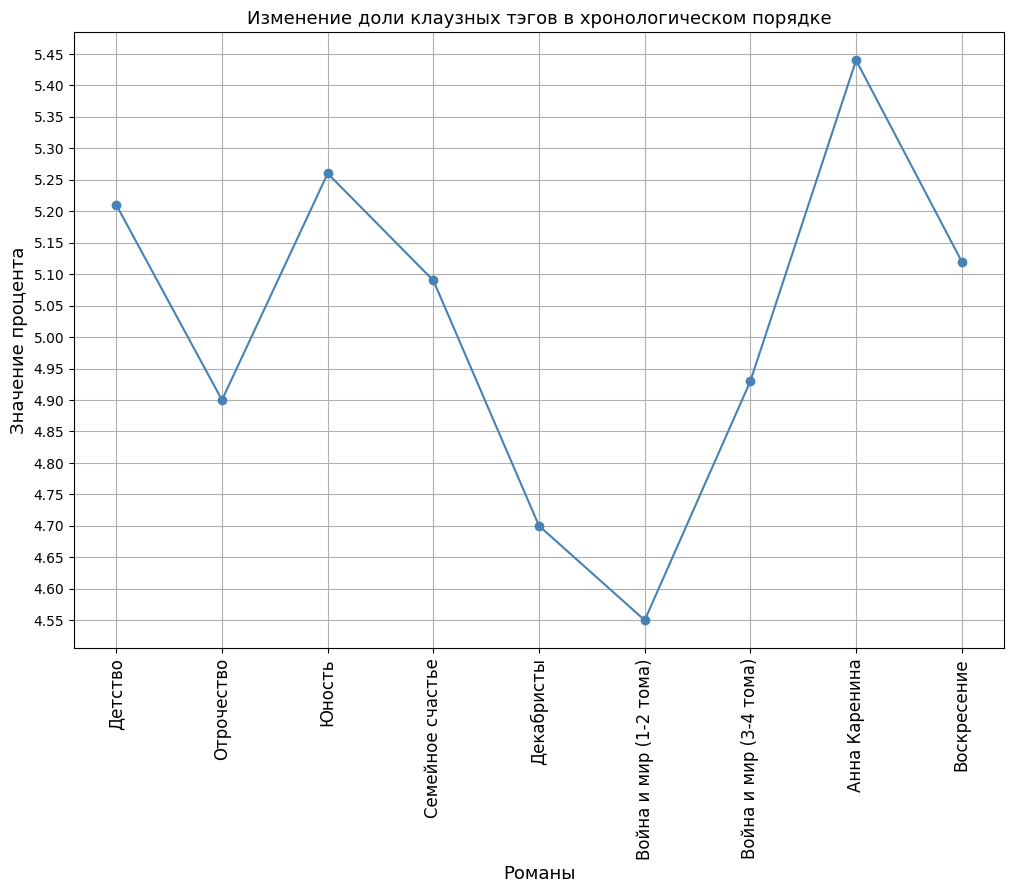

In [103]:
novels["Значение процента"] = pd.to_numeric(novels["Значение процента"])

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05)) 
plt.plot(novels.index, novels["Значение процента"], marker='o', linestyle='-', color='steelblue')
plt.xlabel('Романы', fontsize=13)
plt.ylabel('Значение процента', fontsize=13)
plt.title('Изменение доли клаузных тэгов в хронологическом порядке', fontsize=13)
plt.xticks(rotation=90, fontsize=12)
plt.grid()


plt.show()

In [73]:
data_short_stories = {
    "История вчерашнего дня":["1851", '5.95%', 5.95],
    "Набег":["1853", '4.47%', 4.47],
    "Святочная ночь":["1853", '4.95%', 4.95],
    "Записки маркёра":["1855", '2.94%', 2.94],
    "Рубка леса":["1855", '4%', 4],
    "Разжалованный":["1856", '4.81%', 4.81],
    "Метель":["1856", '4.16%', 4.16],
    "Севастопольские рассказы":["1855-1856",'4.37%', 4.37],
    "Люцерн":["1857", '4.28', 4.28],
    "Три смерти":["1859", '3.49%', 3.49],
    "Кавказский пленник":["1872", '2.62%', 2.62],
    "Ходынка":["1910", '4.02%', 4.02],
    "Благородная почва":["1910", '4.18%', 4.18],
    "Нечаянно":["1910", '3.63%', 3.63]
}

short_stories = pd.DataFrame.from_dict(data_short_stories).T.rename(columns={0:"Год написания", 1:"Доля клаузных тэгов", 2:"Значение процента"})
short_stories

,Год написания,Доля клаузных тэгов,Значение процента
История вчерашнего дня,1851,5.95%,5.95
Набег,1853,4.47%,4.47
Святочная ночь,1853,4.95%,4.95
Записки маркёра,1855,2.94%,2.94
Рубка леса,1855,4%,4
Разжалованный,1856,4.81%,4.81
Метель,1856,4.16%,4.16
Севастопольские рассказы,1855-1856,4.37%,4.37
Люцерн,1857,4.28,4.28
Три смерти,1859,3.49%,3.49


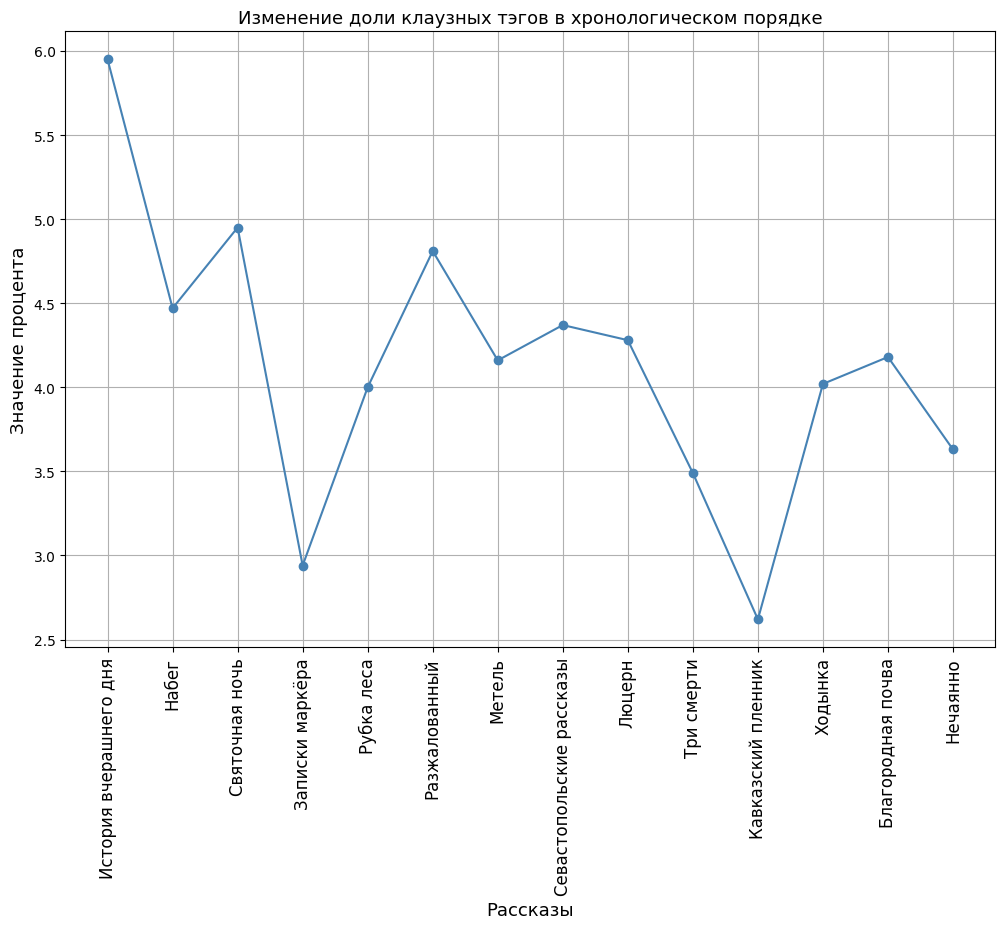

In [102]:
short_stories["Значение процента"] = pd.to_numeric(short_stories["Значение процента"])

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
plt.plot(short_stories.index, short_stories["Значение процента"], marker='o', linestyle='-', color='steelblue')
plt.xlabel('Рассказы', fontsize=13)
plt.ylabel('Значение процента', fontsize=13)
plt.title('Изменение доли клаузных тэгов в хронологическом порядке', fontsize=13)
plt.xticks(rotation=90, fontsize=12)
plt.grid()


plt.show()

In [75]:
data_novellas = {
    "Два гусара":["1856", '4.45%', 4.45],
    "Утро помещика":["1856", '4.51%', 4.51],
    "Альберт":["1858", '4.24%', 4.24],
    "Поликушка":["1862", '4.56%', 4.56],
    "Казаки":["1863", '3.72%', 3.72],
    "Смерть Ивана Ильича":["1884-1886", '5.05%', 5.05],
    "Крейцерова соната":["1887-1889", '5.37%', 5.37],
    "Отец Сергий":["1890-1898",'4.55%', 4.55],
    "Хаджи-Мурат":["1896-1904", '5%', 5],
}

novellas = pd.DataFrame.from_dict(data_novellas).T.rename(columns={0:"Год написания", 1:"Доля клаузных тэгов", 2:"Значение процента"})
novellas

,Год написания,Доля клаузных тэгов,Значение процента
Два гусара,1856,4.45%,4.45
Утро помещика,1856,4.51%,4.51
Альберт,1858,4.24%,4.24
Поликушка,1862,4.56%,4.56
Казаки,1863,3.72%,3.72
Смерть Ивана Ильича,1884-1886,5.05%,5.05
Крейцерова соната,1887-1889,5.37%,5.37
Отец Сергий,1890-1898,4.55%,4.55
Хаджи-Мурат,1896-1904,5%,5


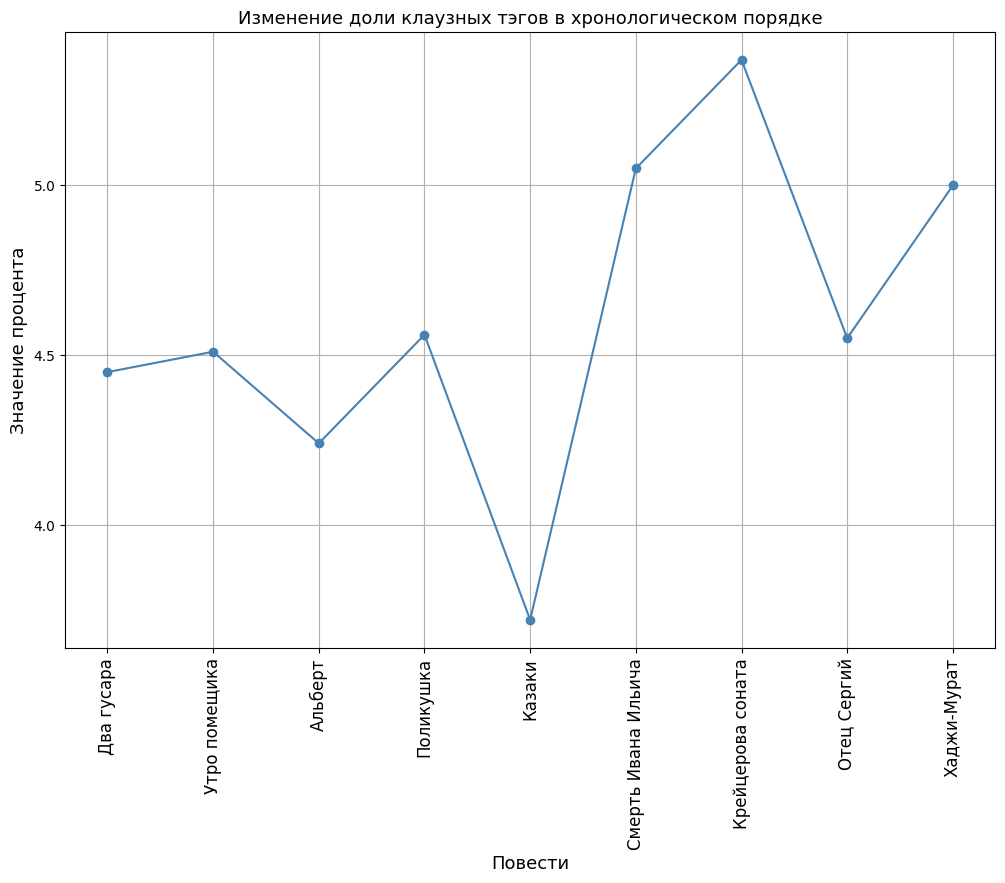

In [101]:
novellas["Значение процента"] = pd.to_numeric(novellas["Значение процента"])

fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
plt.plot(novellas.index, novellas["Значение процента"], marker='o', linestyle='-', color='steelblue')
plt.xlabel('Повести', fontsize=13)
plt.ylabel('Значение процента', fontsize=13)
plt.title('Изменение доли клаузных тэгов в хронологическом порядке', fontsize=13)
plt.xticks(rotation=90, fontsize=12)
plt.grid()

plt.show()

In [77]:
data_all_pieces = {
    "История вчерашнего дня":["1851", '5.95%', 5.95],
    "Детство":["1852", '5.21%', 5.21],
    "Набег":["1853", '4.47%', 4.47],
    "Святочная ночь":["1853", '4.95%', 4.95],
    "Отрочество":["1854", '4.9%', 4.90],
    "Записки маркёра":["1855", '2.94%', 2.94],
    "Рубка леса":["1855", '4%', 4],
    "Севастопольские рассказы":["1855-1856",'4.37%', 4.37],
    "Разжалованный":["1856", '4.81%', 4.81],
    "Метель":["1856", '4.16%', 4.16],
    "Два гусара":["1856", '4.45%', 4.45],
    "Утро помещика":["1856", '4.51%', 4.51],
    "Юность":["1857", '5.26%', 5.26],
    "Люцерн":["1857", '4.28', 4.28],
    "Альберт":["1858", '4.24%', 4.24],
    "Три смерти":["1859", '3.49%', 3.49],
    "Семейное счастие":["1859", '5.09%', 5.09],
    "Декабристы":["1861", '4.7%', 4.70],
    "Поликушка":["1862", '4.56%', 4.56],
    "Казаки":["1863", '3.72%', 3.72],
    "Война и мир (1-2 тома)":["1863-1869",'4.55%', 4.55],
    "Война и мир (3-4 тома)":["1863-1869", '4.93%', 4.93],
    "Кавказский пленник":["1872", '2.62%', 2.62],
    "Анна Каренина":["1875-1877", '5.44%', 5.44],
    "Смерть Ивана Ильича":["1884-1886", '5.05%', 5.05],
    "Крейцерова соната":["1887-1889", '5.37%', 5.37],
    "Отец Сергий":["1890-1898",'4.55%', 4.55],
    "Воскресение":["1899", '5.12%', 5.12],
    "Хаджи-Мурат":["1896-1904", '5%', 5],
    "Ходынка":["1910", '4.02%', 4.02],
    "Благородная почва":["1910", '4.18%', 4.18],
    "Нечаянно":["1910", '3.63%', 3.63],    
}

all_pieces = pd.DataFrame.from_dict(data_all_pieces).T.rename(columns={0:"Год написания", 1:"Доля клаузных тэгов", 2:"Значение процента"})
all_pieces

,Год написания,Доля клаузных тэгов,Значение процента
История вчерашнего дня,1851,5.95%,5.95
Детство,1852,5.21%,5.21
Набег,1853,4.47%,4.47
Святочная ночь,1853,4.95%,4.95
Отрочество,1854,4.9%,4.9
Записки маркёра,1855,2.94%,2.94
Рубка леса,1855,4%,4
Севастопольские рассказы,1855-1856,4.37%,4.37
Разжалованный,1856,4.81%,4.81
Метель,1856,4.16%,4.16


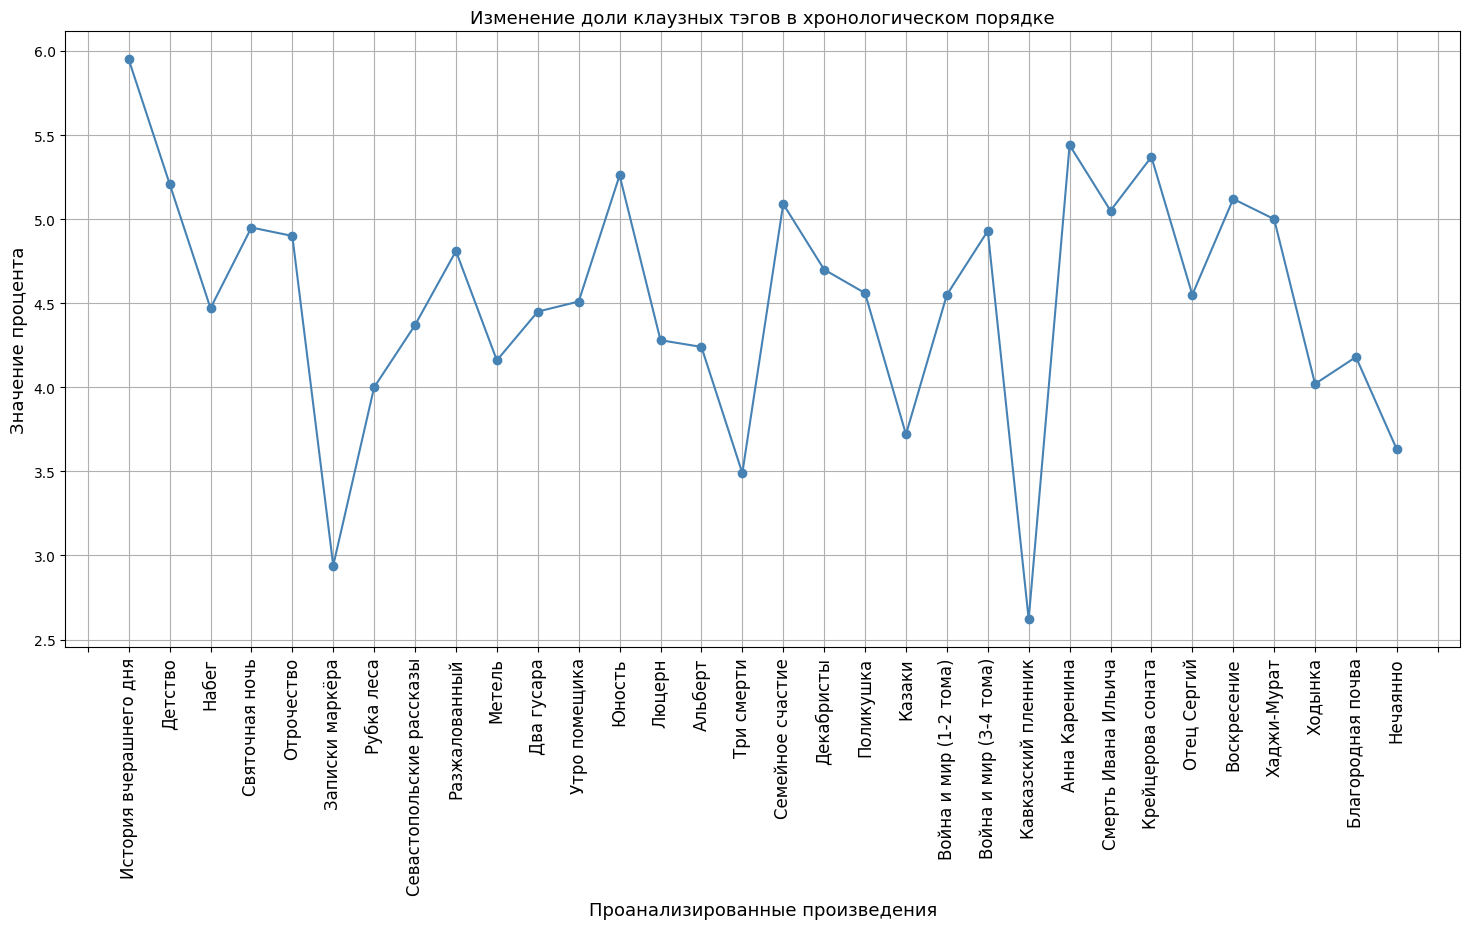

In [100]:
all_pieces["Значение процента"] = pd.to_numeric(all_pieces["Значение процента"])

fig, ax = plt.subplots(figsize=(18,8))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
plt.plot(all_pieces.index, all_pieces["Значение процента"], marker='o', linestyle='-', color='steelblue')
plt.xlabel('Проанализированные произведения', fontsize=13)
plt.ylabel('Значение процента', fontsize=13)
plt.title('Изменение доли клаузных тэгов в хронологическом порядке', fontsize=13)
plt.xticks(rotation=90, fontsize=12)
plt.grid()

plt.show()